# Dataset Import

Connect the Google Drive to the notebook

In [1]:
import os
from google.colab import drive
drive.mount('/content/drive', force_remount=True)

Mounted at /content/drive


In [2]:
os.chdir("/content/drive/MyDrive/dataset")

In [3]:
!pwd

/content/drive/.shortcut-targets-by-id/1NXU303Jgc2_IKKfoQvUhUL3zarWcR-bv/dataset


In [4]:
!ls

 Clothing1M  'Hotel ID'   Hotels-50k   ood_coco   Receipts  'selfie dataset'   Weapon


## Food 101

Jiawei Sun

**Tutorial:** https://datasets.activeloop.ai/docs/ml/datasets/food-101-dataset/

In [ ]:
!pip install deeplake

     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 586.6/586.6 kB 12.8 MB/s eta 0:00:00
  Installing build dependencies ... done
  Getting requirements to build wheel ... done
  Preparing metadata (pyproject.toml) ... done
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 139.3/139.3 kB 20.9 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 82.1/82.1 kB 10.8 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 1.3/1.3 MB 65.2 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 16.7/16.7 MB 65.0 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 116.3/116.3 kB 16.8 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 76.1/76.1 kB 8.5 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 11.9/11.9 MB 90.2 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 139.3/139.3 kB 18.3 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 82.1/82.1 kB 11.7 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 56.8

In [ ]:
import deeplake
food_101 = deeplake.load('hub://activeloop/food-101-dataset-train')

Opening dataset in read-only mode as you don't have write permissions.


/

This dataset can be visualized in Jupyter Notebook by ds.visualize() or at https://app.activeloop.ai/activeloop/food-101-dataset-train



|

hub://activeloop/food-101-dataset-train loaded successfully.



In [ ]:
dataloader = food_101.pytorch(num_workers=0, batch_size=4, shuffle=False)

/usr/local/lib/python3.10/dist-packages/deeplake/integrations/pytorch/common.py:137: UserWarning: Decode method for tensors ['images'] is defaulting to numpy. Please consider specifying a decode_method in .pytorch() that maximizes the data preprocessing speed based on your transformation.
  warnings.warn(


## Weapon

Jiawei Sun

In [45]:
import numpy as np
from sklearn.model_selection import train_test_split
from tensorflow.keras.preprocessing.image import ImageDataGenerator
from sklearn.preprocessing import LabelEncoder
from PIL import Image
import pandas as pd
import cv2

#### **Helper Functions**

In [46]:
# Get the image paths and labels with in the input folder
def get_img_path_label(target_folder):
  img_path = []
  img_label = []
  for folder_name in os.listdir(target_folder):
      folder_path = os.path.join(target_folder, folder_name)
      if os.path.isdir(folder_path):
          for image_filename in os.listdir(folder_path):
              # Construct the full path to the image file
              image_path = os.path.join(folder_path, image_filename)
              # Append the image path to the lists
              img_path.append(image_path)
              # Append the image label to the lists
              img_label.append(folder_name)
  return img_path, img_label

# Get the image resolutions and sizes of given path images
def get_img_resolutions_sizes(img_paths):
  resolutions = []
  sizes = []
  # Loop over image paths and collect data
  for img_path in img_paths:
      # Read the image using OpenCV
      img = cv2.imread(img_path, cv2.IMREAD_UNCHANGED)
      # Get image resolution (height, width)
      height, width = img.shape[:2]
      resolutions.append((width, height))
      # Get image file size in bytes
      sizes.append(os.path.getsize(img_path))
  return resolutions, sizes

### Pistol Classification

In [41]:
pistol_classification = './Weapon/Pistol/Pistol_classification'

In [42]:
# Get img paths and labels
pistol_class_img_path, pistol_class_label = get_img_path_label(pistol_classification)

#### **Label Frequency Distribution**

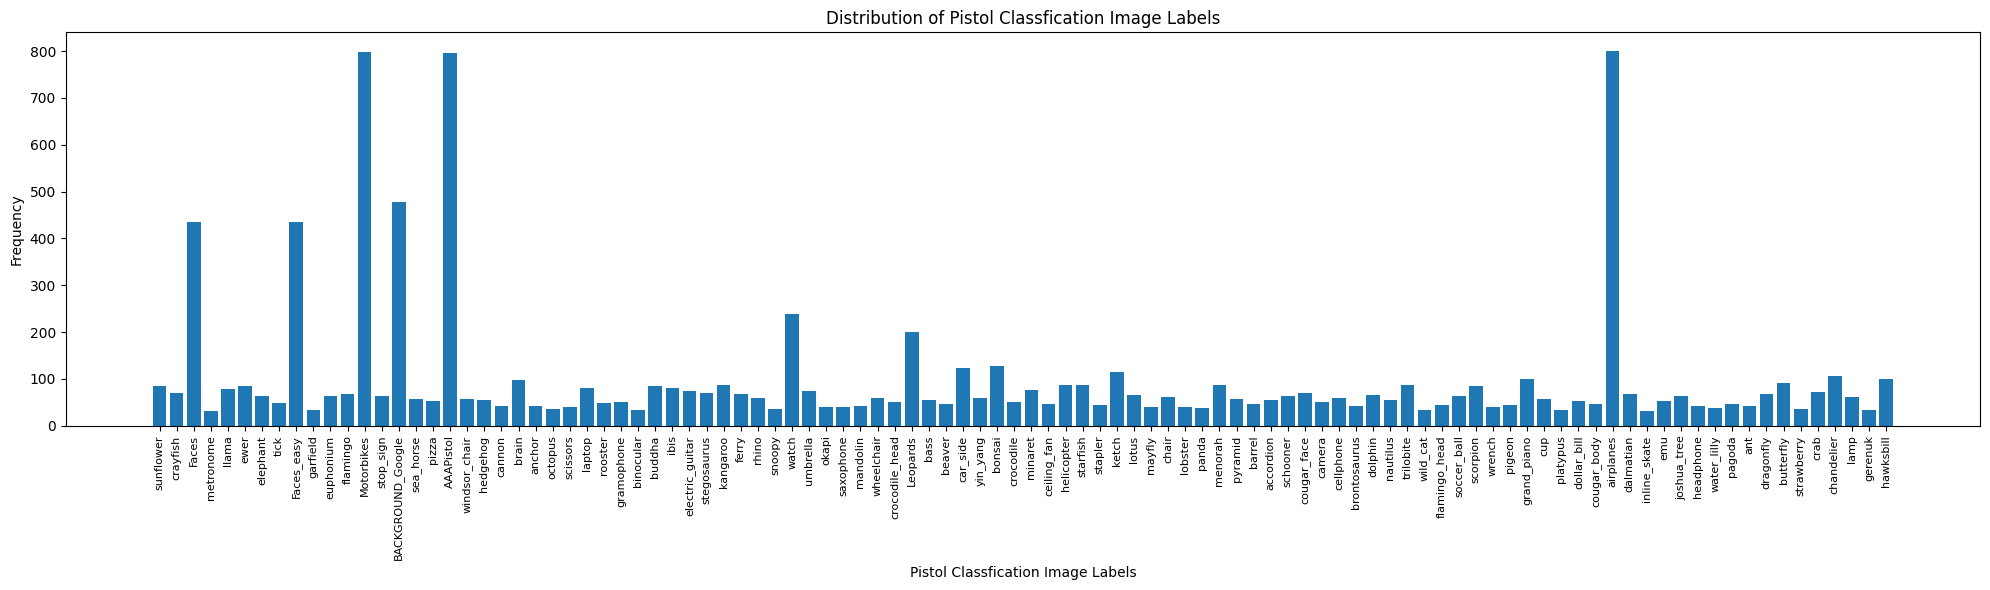

In [43]:
import matplotlib.pyplot as plt
from collections import Counter

# Count the occurrences of each label in the list
label_counts = Counter(pistol_class_label)

# Separate the data into labels and counts
labels, counts = zip(*label_counts.items())

# Set the figure size to make the plot wider
plt.figure(figsize=(20, 6))  # Width, Height in inches

# Plotting
plt.bar(labels, counts)
plt.xlabel('Pistol Classfication Image Labels')
plt.ylabel('Frequency')
plt.title('Distribution of Pistol Classfication Image Labels')
# Rotate the x-axis labels to 90 degrees for better readability
plt.xticks(rotation=90)
# Adjust font size
plt.tick_params(axis='x', which='major', labelsize=8)
# Use a tight layout to fit the axis labels
plt.tight_layout()

plt.show()

#### **Image Resolution & Size Analyzation**

In [ ]:
# Initialize lists to store data
resolutions, sizes = get_img_resolutions_sizes(pistol_class_img_path)

# Convert lists to pandas DataFrame
df = pd.DataFrame({
    'Resolution': resolutions,
    'Size (Bytes)': sizes
})

# Add columns for width, height, and size in KB for easier analysis
df['Width'] = df['Resolution'].apply(lambda x: x[0])
df['Height'] = df['Resolution'].apply(lambda x: x[1])
df['Size (KB)'] = df['Size (Bytes)'] / 1024

# Display basic statistics
print(df.describe())

In [ ]:
# Plot histograms of widths, heights, and file sizes
fig, axs = plt.subplots(1, 3, figsize=(15, 5))
df['Width'].hist(ax=axs[0], bins=20)
axs[0].set_title('Image Widths')
axs[0].set_xlabel('Pixels')
axs[0].set_ylabel('Frequency')

df['Height'].hist(ax=axs[1], bins=20)
axs[1].set_title('Image Heights')
axs[1].set_xlabel('Pixels')

df['Size (KB)'].hist(ax=axs[2], bins=20)
axs[2].set_title('Image File Sizes')
axs[2].set_xlabel('Size (KB)')

plt.tight_layout()
plt.show()

### Pistol Detection

In [ ]:
pistol_detection = './Weapon/Pistol/Pistol_detection'

In [ ]:
# Get img paths and labels
pistol_dect_img_path = get_img_path(pistol_detection)
pistol_dect_label = get_img_label(pistol_detection)

### Knife Classificaton

In [ ]:
knife_classification = './Weapon/Knife/Knife_detection'

In [ ]:
# Get img paths and labels
knife_class_img_path = get_img_path(knife_classification)
knife_class_label = get_img_label(knife_classification)

### Knife Detection

In [ ]:
knife_detection = './Weapon/Knife/Knife_detection'

In [ ]:
# Get img paths and labels
knife_dect_img_path = get_img_path(knife_detection)
knife_dect_label = get_img_label(knife_detection)

# Model training

## Weapon

Jiawei Sun

### Pistol Classfication

In [ ]:
import numpy as np
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Conv2D, MaxPooling2D, Flatten, Dense, Dropout
from tensorflow.keras.optimizers import Adam
from tensorflow.keras.preprocessing.image import load_img, img_to_array

In [ ]:
# Convert labels to a numerical format
le = LabelEncoder()
numerical_labels = le.fit_transform(pistol_class_label)

# Split the dataset
train_images, val_images, train_labels, val_labels = train_test_split(
    pistol_class_img_path,
    numerical_labels,
    test_size=0.2,  # 20% for validation
    stratify=numerical_labels,  # Stratify split according to the labels
    random_state=42  # Seed for reproducibility
)

# Now you can create your ImageDataGenerators for training and validation
train_datagen = ImageDataGenerator(rescale=1./255)
val_datagen = ImageDataGenerator(rescale=1./255)

In [ ]:
def load_and_preprocess_image(image_path):
    img = load_img(image_path, target_size=(224, 224))  # Resize image
    img = img_to_array(img)
    img /= 255.0  # Normalize image
    return img

In [ ]:
# Define a simple CNN model
model = Sequential([
    Conv2D(32, (3, 3), activation='relu', input_shape=(224, 224, 3)),
    MaxPooling2D(2, 2),
    Conv2D(64, (3, 3), activation='relu'),
    MaxPooling2D(2, 2),
    Flatten(),
    Dense(128, activation='relu'),
    Dropout(0.5),
    Dense(len(np.unique(numerical_labels)), activation='softmax')  # Number of classes
])

# Compile the model
model.compile(optimizer=Adam(learning_rate=0.0001), loss='sparse_categorical_crossentropy', metrics=['accuracy'])


In [ ]:
# Train the model using a custom data generator
def custom_data_generator(pistol_class_img_path, pistol_class_label, batch_size):
    while True:
        batch_paths = np.random.choice(a=pistol_class_img_path, size=batch_size)
        batch_input = []
        batch_output = []

        for input_path in batch_paths:
            input = load_and_preprocess_image(input_path)
            output = pistol_class_label[pistol_class_img_path.index(input_path)]

            batch_input.append(input)
            batch_output.append(output)

        batch_x = np.stack(batch_input, axis=0)  # Use np.stack instead of np.array
        batch_y = np.array(batch_output)

        yield batch_x, batch_y

# Training the model with a custom generator
batch_size = 32
train_generator = custom_data_generator(train_images, train_labels, batch_size)
val_generator = custom_data_generator(val_images, val_labels, batch_size)

steps_per_epoch = len(train_images) // batch_size
validation_steps = len(val_images) // batch_size

model.fit(train_generator, steps_per_epoch=steps_per_epoch, epochs=10, validation_data=val_generator, validation_steps=validation_steps)

Epoch 1/10
246/246 [==============================] - 2675s 11s/step - loss: 4.1353 - accuracy: 0.1419 - val_loss: 3.6092 - val_accuracy: 0.2859
Epoch 2/10
246/246 [==============================] - 1117s 5s/step - loss: 3.6159 - accuracy: 0.2387 - val_loss: 3.3809 - val_accuracy: 0.2982
Epoch 3/10
246/246 [==============================] - 848s 3s/step - loss: 3.4411 - accuracy: 0.2706 - val_loss: 3.2059 - val_accuracy: 0.3171
Epoch 4/10
246/246 [==============================] - 803s 3s/step - loss: 3.3003 - accuracy: 0.2854 - val_loss: 3.0407 - val_accuracy: 0.3504
Epoch 5/10
246/246 [==============================] - 794s 3s/step - loss: 3.1808 - accuracy: 0.3023 - val_loss: 3.0140 - val_accuracy: 0.3648
Epoch 6/10
179/246 [====================>.........] - ETA: 3:13 - loss: 3.0398 - accuracy: 0.3218